# Recommender Tutorial on Movie Dataset

This implementation is using pandas, which we use to find the movies that are most similar to each other using correlations and no Machine Learning algorithms are used.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [18]:
columns = ['user_id', 'movie_id', 'rating', 'timestamp']

In [19]:
movie_rating = pd.read_csv('u.data', sep='\t', names=columns)

In [20]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
movie_id     100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [21]:
movie_rating.describe()

,user_id,movie_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [22]:
movie_title = pd.read_csv('Movie_Id_Titles', index_col='item_id')

In [23]:
movie_title.head()

,title
item_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


In [30]:
movie_dataset = pd.merge(movie_rating, movie_title, left_on='movie_id', right_on='item_id')

In [35]:
movie_dataset.head()

,user_id,movie_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA on the data

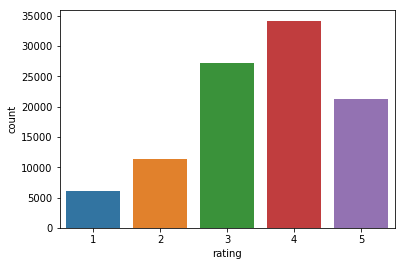

In [37]:
sns.countplot(x='rating', data=movie_dataset)

In [50]:
movie_dataset.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [55]:
movie_dataset.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [63]:
ratings = pd.DataFrame(movie_dataset.groupby('title')['rating'].mean())

In [64]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [65]:
ratings['number of ratings'] = pd.DataFrame(movie_dataset.groupby('title')['rating'].count())

In [66]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [76]:
ratings[ratings['number of ratings'] > 100].sort_values(by='rating', ascending=False).head()

,rating,number of ratings
title,,
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
"Shawshank Redemption, The (1994)",4.445230,283


In [81]:
ratings['number of ratings'].sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: number of ratings, dtype: int64

/home/guyandtheworld/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


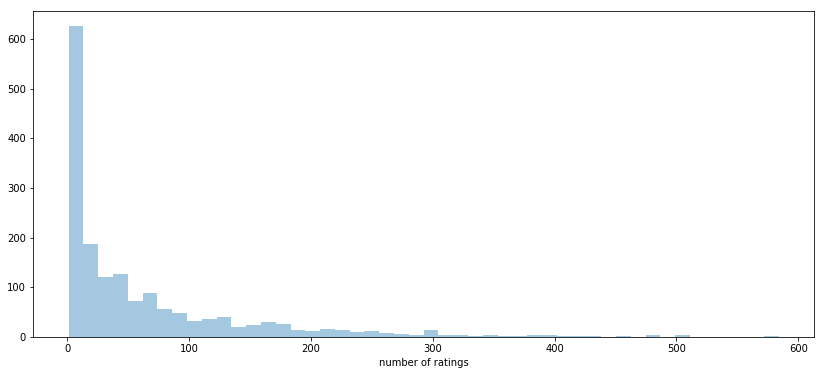

In [92]:
plt.figure(figsize=(14, 6))
# ratings['number of ratings'].hist(bins=79)
sns.distplot(ratings['number of ratings'], kde=False)

### Consensus

Here we can see that the number of Movies with the most number of rating decreases exponentially as the popularity increases. That is, compared to the number of popular movies, the shitty movies outweigh them in huge proportion.